In [211]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Load data

In [212]:
df = pd.read_csv("datasets/Schwelle_Senke/fleet_data__from_11_05_22_and_before__9millionrows.csv", low_memory=False) # , sheet_name=0)

In [308]:
df.columns

Index(['Unnamed: 0', 'zds_telemetrydata_mst.metadata_sourceid',
       'zds_telemetrydata_mst.metadata_region',
       'zds_telemetrydata_mst.metadata_brand',
       'zds_telemetrydata_mst.metadata_reportid',
       'zds_telemetrydata_mst.metadata_sessionsequence',
       'zds_telemetrydata_mst.metadata_timeofreceipt',
       'zds_telemetrydata_mst.metadata_pvin',
       'zds_telemetrydata_mst.metadata_sessionid',
       'zds_telemetrydata_mst.metadata_messageid',
       'zds_telemetrydata_mst.signaldata_signalid',
       'zds_telemetrydata_mst.signaldata_signalname',
       'zds_telemetrydata_mst.signaldata_unit',
       'zds_telemetrydata_mst.signaldata_timeofoccurrence',
       'zds_telemetrydata_mst.signaldata_rawvalue_signalopaquevalue',
       'zds_telemetrydata_mst.signaldata_rawvalue_signalvalue',
       'zds_telemetrydata_mst.signaldata_interpretedvalue_asdoublevalue',
       'zds_telemetrydata_mst.signaldata_interpretedvalue_asstringvalue',
       'zds_telemetrydata_mst.signa

In [214]:
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0 zds_telemetrydata_mst.metadata_sourceid  \
0           0                              Porsche:IT   
1           1                              Porsche:DE   
2           2                              Porsche:IT   
3           3                              Porsche:DE   
4           4                              Porsche:IT   

  zds_telemetrydata_mst.metadata_region zds_telemetrydata_mst.metadata_brand  \
0                                    eu                           Porsche:IT   
1                                    eu                           Porsche:DE   
2                                    eu                           Porsche:IT   
3                                    eu                           Porsche:DE   
4                                    eu                           Porsche:IT   

  zds_telemetrydata_mst.metadata_reportid  \
0    d4feb93f-3d86-423d-a7e6-75d582729067   
1    d4feb93f-3d86-423d-a7e6-75d582729067   
2    d4feb93f-3d86-423d-a7e6-75d582729067   
3    d4feb93f-3d86-423d-a7e6-75d582729067   
4    d4feb93f-3d86-423d-a7e6-75d582729067   

   zds_telemetrydata_mst.metadata_sessionsequence  \
0                                               5   
1                                               1   
2                                               5   
3                                               1   
4                                               5   

   zds_telemetrydata_mst.metadata_timeofreceipt  \
0                                 1651159474158   
1                                 1651130943346   
2                                 1651159474158   
3                                 1651130943346   
4                                 1651159474158   

  zds_telemetrydata_mst.metadata_pvin  \
0    c7b0a1b3051fba5898dc460291c2d32f   
1    a36767d2f8c7280fbbb4f113909f3e3b   
2    c7b0a1b3051fba5898dc460291c2d32f   
3    a36767d2f8c7280fbbb4f113909f3e3b   
4    c7b0a1b3051fba5898dc460291c2d32f   

   zds_telemetrydata_mst.metadata_sessionid  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

  zds_telemetrydata_mst.metadata_messageid  \
0     4e667e28-c847-4c3b-822f-5d42079c8158   
1     7cd3f1a5-db16-4f63-a748-8b3d21cd4c6d   
2     4e667e28-c847-4c3b-822f-5d42079c8158   
3     7cd3f1a5-db16-4f63-a748-8b3d21cd4c6d   
4     4e667e28-c847-4c3b-822f-5d42079c8158   

   zds_telemetrydata_mst.signaldata_signalid  \
0                                     102812   
1                                     102812   
2                                     102812   
3                                     102812   
4                                     102812   

  zds_telemetrydata_mst.signaldata_signalname  \
0                                ESP_v_Signal   
1                                ESP_v_Signal   
2                                ESP_v_Signal   
3                                ESP_v_Signal   
4                                ESP_v_Signal   

   zds_telemetrydata_mst.signaldata_unit  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   zds_telemetrydata_mst.signaldata_timeofoccurrence  \
0                                      1651159427639   
1                                      1651129811129   
2                                      1651159427659   
3                                      1651129811149   
4                                      1651159427679   

   zds_telemetrydata_mst.signaldata_rawvalue_signalopaquevalue  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                        

In [215]:
df["zds_telemetrydata_mst.metadata_brand"].value_counts()

Porsche:DE    3340219
Porsche:PL    1869079
Porsche:SE     815695
Porsche:BE     802935
Porsche:CH     717027
               ...   
Porsche:NL     179154
Porsche:AT     170110
Porsche:LU      98148
Porsche:ES      24750
Porsche:SI      13500
Name: zds_telemetrydata_mst.metadata_brand, Length: 14, dtype: int64

In [216]:
df["zds_telemetrydata_mst.metadata_region"].value_counts()

eu    9349504
Name: zds_telemetrydata_mst.metadata_region, dtype: int64

In [217]:
df["zds_telemetrydata_mst.metadata_pvin"].value_counts()

5bcf863993ae5928243c8af871d6ccbc    978384
4989ca4dc2f8c580284eb3c5d0c01cae    627353
1edec18836297b0cac0fb1d0b33b1bae    462301
6086b94a1994a388f74a786a40a53401    434517
8e54ddde2e1c2293b27c5b4fbb8da3fe    249605
                                     ...  
240fde6db0f8fb6d70a2f851317eedf7      4500
bbdf740ecd57e8387b64ff8254f576fb      2250
5e995f8e820f811da09cb60e2093a1a3      2250
b365e8d9ec298489f44917b6c3e44ed8      2250
35efde8a9a27565067b45106c74f37ff      2250
Name: zds_telemetrydata_mst.metadata_pvin, Length: 104, dtype: int64

In [218]:
df["zds_telemetrydata_mst.signaldata_unit"].value_counts()

Series([], Name: zds_telemetrydata_mst.signaldata_unit, dtype: int64)

In [219]:
df["zds_telemetrydata_mst.date"].value_counts()

2022-05-11    1530734
2022-05-09     795501
2022-05-04     747459
2022-05-10     731844
2022-05-02     676404
               ...   
2022-05-05     601622
2022-05-01     482846
2022-05-08     463894
2022-04-28     447853
2022-04-30     322939
Name: zds_telemetrydata_mst.date, Length: 14, dtype: int64

In [309]:
df["zds_telemetrydata_mst.metadata_campaignid"].value_counts()

0e25f491-cc8f-4017-aea4-fca47fe57ac5    9349504
Name: zds_telemetrydata_mst.metadata_campaignid, dtype: int64

# Rename columns

In [220]:
df.columns

Index(['Unnamed: 0', 'zds_telemetrydata_mst.metadata_sourceid',
       'zds_telemetrydata_mst.metadata_region',
       'zds_telemetrydata_mst.metadata_brand',
       'zds_telemetrydata_mst.metadata_reportid',
       'zds_telemetrydata_mst.metadata_sessionsequence',
       'zds_telemetrydata_mst.metadata_timeofreceipt',
       'zds_telemetrydata_mst.metadata_pvin',
       'zds_telemetrydata_mst.metadata_sessionid',
       'zds_telemetrydata_mst.metadata_messageid',
       'zds_telemetrydata_mst.signaldata_signalid',
       'zds_telemetrydata_mst.signaldata_signalname',
       'zds_telemetrydata_mst.signaldata_unit',
       'zds_telemetrydata_mst.signaldata_timeofoccurrence',
       'zds_telemetrydata_mst.signaldata_rawvalue_signalopaquevalue',
       'zds_telemetrydata_mst.signaldata_rawvalue_signalvalue',
       'zds_telemetrydata_mst.signaldata_interpretedvalue_asdoublevalue',
       'zds_telemetrydata_mst.signaldata_interpretedvalue_asstringvalue',
       'zds_telemetrydata_mst.signa

In [221]:
new_df = df.rename(columns=lambda s: s.replace("zds_telemetrydata_mst.", "")) # df will not be modified !

In [222]:
new_df.columns

Index(['Unnamed: 0', 'metadata_sourceid', 'metadata_region', 'metadata_brand',
       'metadata_reportid', 'metadata_sessionsequence',
       'metadata_timeofreceipt', 'metadata_pvin', 'metadata_sessionid',
       'metadata_messageid', 'signaldata_signalid', 'signaldata_signalname',
       'signaldata_unit', 'signaldata_timeofoccurrence',
       'signaldata_rawvalue_signalopaquevalue',
       'signaldata_rawvalue_signalvalue',
       'signaldata_interpretedvalue_asdoublevalue',
       'signaldata_interpretedvalue_asstringvalue',
       'signaldata_interpretedvalue_isvalid',
       'signaldata_interpretedvalue_iserror',
       'signaldata_interpretedvalue_isinit', 'histogram', 'date',
       'metadata_campaignid', 'year', 'month', 'day'],
      dtype='object')

# Filtering out rows with invalid values 

In [223]:
new_df["signaldata_interpretedvalue_isvalid"].value_counts()

True     9323007
False      26497
Name: signaldata_interpretedvalue_isvalid, dtype: int64

In [224]:
new_df.shape[0]

9349504

In [225]:
new_df = new_df[new_df["signaldata_interpretedvalue_isvalid"] == True]

In [226]:
new_df.shape[0]

9323007

In [227]:
new_df["signaldata_interpretedvalue_iserror"].value_counts()

False    9323007
Name: signaldata_interpretedvalue_iserror, dtype: int64

In [228]:
new_df["metadata_region"].value_counts()

eu    9323007
Name: metadata_region, dtype: int64

In [229]:
new_df = new_df.drop(["metadata_region"], axis=1)

In [230]:
new_df["year"].value_counts()

2022    9323007
Name: year, dtype: int64

In [231]:
new_df = new_df.drop(["year"], axis=1)

In [232]:
new_df["histogram"].value_counts()

Series([], Name: histogram, dtype: int64)

# Delete columns with only nan values

In [233]:
list_nan_columns = new_df.columns[new_df.isnull().all()].tolist()
list_nan_columns

['metadata_sessionid',
 'signaldata_unit',
 'signaldata_rawvalue_signalopaquevalue',
 'signaldata_interpretedvalue_asstringvalue',
 'histogram']

In [234]:
new_df = new_df.drop(list_nan_columns, axis=1)

In [235]:
new_df.columns

Index(['Unnamed: 0', 'metadata_sourceid', 'metadata_brand',
       'metadata_reportid', 'metadata_sessionsequence',
       'metadata_timeofreceipt', 'metadata_pvin', 'metadata_messageid',
       'signaldata_signalid', 'signaldata_signalname',
       'signaldata_timeofoccurrence', 'signaldata_rawvalue_signalvalue',
       'signaldata_interpretedvalue_asdoublevalue',
       'signaldata_interpretedvalue_isvalid',
       'signaldata_interpretedvalue_iserror',
       'signaldata_interpretedvalue_isinit', 'date', 'metadata_campaignid',
       'month', 'day'],
      dtype='object')

# Delete columns with same values

In [236]:
[(i, j) for i,j in combinations(new_df, 2) if new_df[i].equals(new_df[j])]

[('metadata_sourceid', 'metadata_brand'),
 ('signaldata_interpretedvalue_iserror', 'signaldata_interpretedvalue_isinit')]

In [237]:
new_df = new_df.drop(["metadata_brand", "signaldata_interpretedvalue_isinit"], axis=1)
# new_df

In [238]:
new_df.columns

Index(['Unnamed: 0', 'metadata_sourceid', 'metadata_reportid',
       'metadata_sessionsequence', 'metadata_timeofreceipt', 'metadata_pvin',
       'metadata_messageid', 'signaldata_signalid', 'signaldata_signalname',
       'signaldata_timeofoccurrence', 'signaldata_rawvalue_signalvalue',
       'signaldata_interpretedvalue_asdoublevalue',
       'signaldata_interpretedvalue_isvalid',
       'signaldata_interpretedvalue_iserror', 'date', 'metadata_campaignid',
       'month', 'day'],
      dtype='object')

In [239]:
new_df["metadata_campaignid"].value_counts()

0e25f491-cc8f-4017-aea4-fca47fe57ac5    9323007
Name: metadata_campaignid, dtype: int64

In [240]:
new_df["metadata_sourceid"].value_counts()

Porsche:DE    3330226
Porsche:PL    1863990
Porsche:SE     813622
Porsche:BE     800347
Porsche:CH     714429
               ...   
Porsche:NL     178530
Porsche:AT     169874
Porsche:LU      98111
Porsche:ES      24749
Porsche:SI      13435
Name: metadata_sourceid, Length: 14, dtype: int64

In [241]:
new_df["metadata_reportid"].value_counts()

d4feb93f-3d86-423d-a7e6-75d582729067    9323007
Name: metadata_reportid, dtype: int64

In [242]:
new_df = new_df.drop(["metadata_reportid", "metadata_campaignid"], axis=1)

In [243]:
new_df["metadata_sessionsequence"].value_counts()

0      269573
1      245854
2      236357
4      215681
3      209304
        ...  
363      1887
316      1501
362      1024
360       217
361       192
Name: metadata_sessionsequence, Length: 415, dtype: int64

# Select columns to build training dataset

In [244]:
data = new_df[[
            "metadata_sourceid",
            "metadata_sessionsequence",
            "metadata_pvin",
            "date",
            "signaldata_signalname", 
            "signaldata_timeofoccurrence", 
            "signaldata_rawvalue_signalvalue", 
            "signaldata_interpretedvalue_asdoublevalue",
            ]]

In [245]:
data

metadata_sourceid  metadata_sessionsequence  \
0              Porsche:IT                         5   
1              Porsche:DE                         1   
2              Porsche:IT                         5   
3              Porsche:DE                         1   
4              Porsche:IT                         5   
...                   ...                       ...   
9349499        Porsche:DE                         0   
9349500        Porsche:DE                         0   
9349501        Porsche:DE                         0   
9349502        Porsche:DE                         0   
9349503        Porsche:DE                         0   

                            metadata_pvin        date signaldata_signalname  \
0        c7b0a1b3051fba5898dc460291c2d32f  2022-04-28          ESP_v_Signal   
1        a36767d2f8c7280fbbb4f113909f3e3b  2022-04-28          ESP_v_Signal   
2        c7b0a1b3051fba5898dc460291c2d32f  2022-04-28          ESP_v_Signal   
3        a36767d2f8c7280fbbb4f113909f3e3b  2022-04-28          ESP_v_Signal   
4        c7b0a1b3051fba5898dc460291c2d32f  2022-04-28          ESP_v_Signal   
...                                   ...         ...                   ...   
9349499  aef70266af644c03d56cd20fdc45c2e4  2022-05-09   FA_Hoehenwert_HL_00   
9349500  aef70266af644c03d56cd20fdc45c2e4  2022-05-09   FA_Hoehenwert_HL_00   
9349501  aef70266af644c03d56cd20fdc45c2e4  2022-05-09   FA_Hoehenwert_HL_00   
9349502  aef70266af644c03d56cd20fdc45c2e4  2022-05-09   FA_Hoehenwert_HL_00   
9349503  aef70266af644c03d56cd20fdc45c2e4  2022-05-09   FA_Hoehenwert_HL_00   

         signaldata_timeofoccurrence  signaldata_rawvalue_signalvalue  \
0                      1651159427639                                0   
1                      1651129811129                                0   
2                      1651159427659                                0   
3                      1651129811149                                0   
4                      1651159427679                                0   
...                              ...                              ...   
9349499                1652126490140                              125   
9349500                1652126490160                              125   
9349501                1652126490180                              125   
9349502                1652126490200                              125   
9349503                1652126490220                              125   

         signaldata_interpretedvalue_asdoublevalue  
0                                              0.0  
1                                              0.0  
2                                              0.0  
3                                              0.0  
4                                              0.0  
...                                            ...  
9349499                                       -2.0  
9349500                                       -2.0  
9349501                                       -2.0  
9349502                                       -2.0  
9349503                                       -2.0  

[9323007 rows x 8 columns]

In [246]:
# Public Vehicle Identification Number
data["metadata_pvin"].value_counts()

5bcf863993ae5928243c8af871d6ccbc    975716
4989ca4dc2f8c580284eb3c5d0c01cae    625590
1edec18836297b0cac0fb1d0b33b1bae    460783
6086b94a1994a388f74a786a40a53401    432781
8e54ddde2e1c2293b27c5b4fbb8da3fe    248814
                                     ...  
14d3748192e2022e29853177cc5ac994      4459
bbdf740ecd57e8387b64ff8254f576fb      2250
5e995f8e820f811da09cb60e2093a1a3      2250
b365e8d9ec298489f44917b6c3e44ed8      2250
35efde8a9a27565067b45106c74f37ff      2250
Name: metadata_pvin, Length: 104, dtype: int64

In [247]:
data["metadata_sessionsequence"].value_counts()

0      269573
1      245854
2      236357
4      215681
3      209304
        ...  
363      1887
316      1501
362      1024
360       217
361       192
Name: metadata_sessionsequence, Length: 415, dtype: int64

# Groupby

In [248]:
reorganized_dataset = data.groupby(["metadata_sourceid", "metadata_pvin", "metadata_sessionsequence", "date", "signaldata_signalname"]).size() # == "ESP_v_Signal"].value_counts()

In [249]:
pd.set_option('display.max_rows', None)
reorganized_dataset
#print(reorganized_dataset.to_string())

metadata_sourceid  metadata_pvin                     metadata_sessionsequence  date        signaldata_signalname 
Porsche:AT         18c237c11bfba998fc2d317b6858c315  0                         2022-05-05  ESP_v_Signal               250
                                                                                           FA_BodyAcceleration_HL     250
                                                                                           FA_BodyAcceleration_HR     250
                                                                                           FA_BodyAcceleration_VL     250
                                                                                           FA_BodyAcceleration_VR     250
                                                                                           FA_Hoehenwert_HL_00        250
                                                                                           FA_Hoehenwert_HR_00        250
                                

In [250]:
data["metadata_pvin"].value_counts()

5bcf863993ae5928243c8af871d6ccbc    975716
4989ca4dc2f8c580284eb3c5d0c01cae    625590
1edec18836297b0cac0fb1d0b33b1bae    460783
6086b94a1994a388f74a786a40a53401    432781
8e54ddde2e1c2293b27c5b4fbb8da3fe    248814
c0a731ff307eb9da5e284d6ae88d8457    246479
94fe4898ded2edd3f60a39032e9386c4    219828
a9341c49ae30642384a356b19270c541    213130
22311cec41ebdc5b111a5d10ec4a1ee7    194002
93753e82e9d3e1f093b28eb386de9f1a    192734
7edd91949310d2fc03866df1c440203a    171780
18c237c11bfba998fc2d317b6858c315    169874
7134337ac4928f1456f6d842c6337745    157657
d64d096a880d90d435b2cce32440f219    150539
10f5b74d9c3d85d732e32f22b4367896    140977
106406e8c71547643e086f15bea4e615    140769
864cb7d951e5781a949ad9d82bc1b1ca    139308
6d18f32fcb00407551421c1336fc806c    138894
b218717b97ef52bb4dbd2b73b89ea262    134695
67a5af1f39431887d41e48dea785f741    133192
f05383a1fc4275d6a1c408d0236fb54d    128671
c0728c2e2f51f913312fed9f475df558    125985
7884f65ba95744d9ea56f3040254d9fc    121358
3547965a4cd

In [251]:
data["date"].value_counts()

2022-05-11    1526308
2022-05-09     793285
2022-05-04     745058
2022-05-10     729535
2022-05-02     674684
2022-05-03     659722
2022-05-06     637586
2022-05-07     627825
2022-04-29     615967
2022-05-05     599697
2022-05-01     481628
2022-05-08     462795
2022-04-28     446823
2022-04-30     322094
Name: date, dtype: int64

# Choosing one pvin, one sessionsequence and one day in particular: 2022-04-30

In [252]:
test_dataset_pvin_sessionsequence = data.loc[
            (data["metadata_sourceid"] == "Porsche:AT") &
            (data["metadata_pvin"] == "18c237c11bfba998fc2d317b6858c315") &
            (data["metadata_sessionsequence"] == 0) & # 45
            (data["date"] ==  "2022-05-05")] # "2022-05-11")] #

In [253]:
test_dataset_pvin_sessionsequence.groupby("signaldata_signalname").size()

signaldata_signalname
ESP_v_Signal              250
FA_BodyAcceleration_HL    250
FA_BodyAcceleration_HR    250
FA_BodyAcceleration_VL    250
FA_BodyAcceleration_VR    250
FA_Hoehenwert_HL_00       250
FA_Hoehenwert_HR_00       250
FA_Hoehenwert_VL_00       250
FA_Hoehenwert_VR_00       250
dtype: int64

In [254]:
dfESP = test_dataset_pvin_sessionsequence[test_dataset_pvin_sessionsequence.signaldata_signalname == "ESP_v_Signal"]
dfFA = test_dataset_pvin_sessionsequence[test_dataset_pvin_sessionsequence.signaldata_signalname != "ESP_v_Signal"]

In [255]:
dfESP["signaldata_signalname"].value_counts()

ESP_v_Signal    250
Name: signaldata_signalname, dtype: int64

In [256]:
dfFA["signaldata_signalname"].value_counts()

FA_BodyAcceleration_HL    250
FA_Hoehenwert_VL_00       250
FA_Hoehenwert_HR_00       250
FA_BodyAcceleration_VL    250
FA_BodyAcceleration_VR    250
FA_Hoehenwert_VR_00       250
FA_BodyAcceleration_HR    250
FA_Hoehenwert_HL_00       250
Name: signaldata_signalname, dtype: int64

In [257]:
pd.set_option('display.max_rows', 10)
dfFA

metadata_sourceid  metadata_sessionsequence  \
6323932        Porsche:AT                         0   
6323934        Porsche:AT                         0   
6323936        Porsche:AT                         0   
6323938        Porsche:AT                         0   
6323940        Porsche:AT                         0   
...                   ...                       ...   
6327922        Porsche:AT                         0   
6327924        Porsche:AT                         0   
6327926        Porsche:AT                         0   
6327928        Porsche:AT                         0   
6327930        Porsche:AT                         0   

                            metadata_pvin        date   signaldata_signalname  \
6323932  18c237c11bfba998fc2d317b6858c315  2022-05-05  FA_BodyAcceleration_HL   
6323934  18c237c11bfba998fc2d317b6858c315  2022-05-05  FA_BodyAcceleration_HL   
6323936  18c237c11bfba998fc2d317b6858c315  2022-05-05  FA_BodyAcceleration_HL   
6323938  18c237c11bfba998fc2d317b6858c315  2022-05-05  FA_BodyAcceleration_HL   
6323940  18c237c11bfba998fc2d317b6858c315  2022-05-05  FA_BodyAcceleration_HL   
...                                   ...         ...                     ...   
6327922  18c237c11bfba998fc2d317b6858c315  2022-05-05     FA_Hoehenwert_HL_00   
6327924  18c237c11bfba998fc2d317b6858c315  2022-05-05     FA_Hoehenwert_HL_00   
6327926  18c237c11bfba998fc2d317b6858c315  2022-05-05     FA_Hoehenwert_HL_00   
6327928  18c237c11bfba998fc2d317b6858c315  2022-05-05     FA_Hoehenwert_HL_00   
6327930  18c237c11bfba998fc2d317b6858c315  2022-05-05     FA_Hoehenwert_HL_00   

         signaldata_timeofoccurrence  signaldata_rawvalue_signalvalue  \
6323932                1651767894498                              987   
6323934                1651767894518                             1025   
6323936                1651767894538                             1044   
6323938                1651767894558                             1063   
6323940                1651767894578                             1069   
...                              ...                              ...   
6327922                1651767899398                              123   
6327924                1651767899418                              123   
6327926                1651767899438                              123   
6327928                1651767899458                              123   
6327930                1651767899478                              123   

         signaldata_interpretedvalue_asdoublevalue  
6323932                                      -0.71  
6323934                                       0.05  
6323936                                       0.43  
6323938                                       0.81  
6323940                                       0.93  
...                                            ...  
6327922                                      -4.00  
6327924                                      -4.00  
6327926                                      -4.00  
6327928                                      -4.00  
6327930                                      -4.00  

[2000 rows x 8 columns]

In [258]:
dfFA_filtered = dfFA.drop(["metadata_sessionsequence", "metadata_pvin", "date", "metadata_sourceid"], axis=1)
dfFA_filtered

signaldata_signalname  signaldata_timeofoccurrence  \
6323932  FA_BodyAcceleration_HL                1651767894498   
6323934  FA_BodyAcceleration_HL                1651767894518   
6323936  FA_BodyAcceleration_HL                1651767894538   
6323938  FA_BodyAcceleration_HL                1651767894558   
6323940  FA_BodyAcceleration_HL                1651767894578   
...                         ...                          ...   
6327922     FA_Hoehenwert_HL_00                1651767899398   
6327924     FA_Hoehenwert_HL_00                1651767899418   
6327926     FA_Hoehenwert_HL_00                1651767899438   
6327928     FA_Hoehenwert_HL_00                1651767899458   
6327930     FA_Hoehenwert_HL_00                1651767899478   

         signaldata_rawvalue_signalvalue  \
6323932                              987   
6323934                             1025   
6323936                             1044   
6323938                             1063   
6323940                             1069   
...                                  ...   
6327922                              123   
6327924                              123   
6327926                              123   
6327928                              123   
6327930                              123   

         signaldata_interpretedvalue_asdoublevalue  
6323932                                      -0.71  
6323934                                       0.05  
6323936                                       0.43  
6323938                                       0.81  
6323940                                       0.93  
...                                            ...  
6327922                                      -4.00  
6327924                                      -4.00  
6327926                                      -4.00  
6327928                                      -4.00  
6327930                                      -4.00  

[2000 rows x 4 columns]

In [259]:
dfFA_filtered = dfFA_filtered.rename(columns=lambda s: s.replace("signaldata_", ""))
dfFA_filtered

signalname  timeofoccurrence  rawvalue_signalvalue  \
6323932  FA_BodyAcceleration_HL     1651767894498                   987   
6323934  FA_BodyAcceleration_HL     1651767894518                  1025   
6323936  FA_BodyAcceleration_HL     1651767894538                  1044   
6323938  FA_BodyAcceleration_HL     1651767894558                  1063   
6323940  FA_BodyAcceleration_HL     1651767894578                  1069   
...                         ...               ...                   ...   
6327922     FA_Hoehenwert_HL_00     1651767899398                   123   
6327924     FA_Hoehenwert_HL_00     1651767899418                   123   
6327926     FA_Hoehenwert_HL_00     1651767899438                   123   
6327928     FA_Hoehenwert_HL_00     1651767899458                   123   
6327930     FA_Hoehenwert_HL_00     1651767899478                   123   

         interpretedvalue_asdoublevalue  
6323932                           -0.71  
6323934                            0.05  
6323936                            0.43  
6323938                            0.81  
6323940                            0.93  
...                                 ...  
6327922                           -4.00  
6327924                           -4.00  
6327926                           -4.00  
6327928                           -4.00  
6327930                           -4.00  

[2000 rows x 4 columns]

In [260]:
dfFA_filtered["signalname"].value_counts()

FA_BodyAcceleration_HL    250
FA_Hoehenwert_VL_00       250
FA_Hoehenwert_HR_00       250
FA_BodyAcceleration_VL    250
FA_BodyAcceleration_VR    250
FA_Hoehenwert_VR_00       250
FA_BodyAcceleration_HR    250
FA_Hoehenwert_HL_00       250
Name: signalname, dtype: int64

In [261]:
dfsplit = dfFA_filtered["signalname"].apply(lambda x:x.split("_"))
dfFA_filtered_formatted = dfFA_filtered.assign(
    signal = dfsplit.apply(lambda x: x[1]),
    position = dfsplit.apply(lambda x: x[2]),
).drop(columns=['signalname'])

dfFA_filtered_formatted

timeofoccurrence  rawvalue_signalvalue  \
6323932     1651767894498                   987   
6323934     1651767894518                  1025   
6323936     1651767894538                  1044   
6323938     1651767894558                  1063   
6323940     1651767894578                  1069   
...                   ...                   ...   
6327922     1651767899398                   123   
6327924     1651767899418                   123   
6327926     1651767899438                   123   
6327928     1651767899458                   123   
6327930     1651767899478                   123   

         interpretedvalue_asdoublevalue            signal position  
6323932                           -0.71  BodyAcceleration       HL  
6323934                            0.05  BodyAcceleration       HL  
6323936                            0.43  BodyAcceleration       HL  
6323938                            0.81  BodyAcceleration       HL  
6323940                            0.93  BodyAcceleration       HL  
...                                 ...               ...      ...  
6327922                           -4.00        Hoehenwert       HL  
6327924                           -4.00        Hoehenwert       HL  
6327926                           -4.00        Hoehenwert       HL  
6327928                           -4.00        Hoehenwert       HL  
6327930                           -4.00        Hoehenwert       HL  

[2000 rows x 5 columns]

# Distribution of height (Hoehenwert) values

In [262]:
df_hohenwert = dfFA_filtered_formatted[dfFA_filtered_formatted.signal == "Hoehenwert"]

In [263]:
df_hohenwert.columns

Index(['timeofoccurrence', 'rawvalue_signalvalue',
       'interpretedvalue_asdoublevalue', 'signal', 'position'],
      dtype='object')

In [264]:
df_hohenwert

timeofoccurrence  rawvalue_signalvalue  \
6324432     1651767894498                   106   
6324434     1651767894518                   106   
6324436     1651767894538                   106   
6324438     1651767894558                   107   
6324440     1651767894578                   108   
...                   ...                   ...   
6327922     1651767899398                   123   
6327924     1651767899418                   123   
6327926     1651767899438                   123   
6327928     1651767899458                   123   
6327930     1651767899478                   123   

         interpretedvalue_asdoublevalue      signal position  
6324432                           -21.0  Hoehenwert       VL  
6324434                           -21.0  Hoehenwert       VL  
6324436                           -21.0  Hoehenwert       VL  
6324438                           -20.0  Hoehenwert       VL  
6324440                           -19.0  Hoehenwert       VL  
...                                 ...         ...      ...  
6327922                            -4.0  Hoehenwert       HL  
6327924                            -4.0  Hoehenwert       HL  
6327926                            -4.0  Hoehenwert       HL  
6327928                            -4.0  Hoehenwert       HL  
6327930                            -4.0  Hoehenwert       HL  

[1000 rows x 5 columns]

position
HL    AxesSubplot(0.125,0.11;0.775x0.77)
HR    AxesSubplot(0.125,0.11;0.775x0.77)
VL    AxesSubplot(0.125,0.11;0.775x0.77)
VR    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

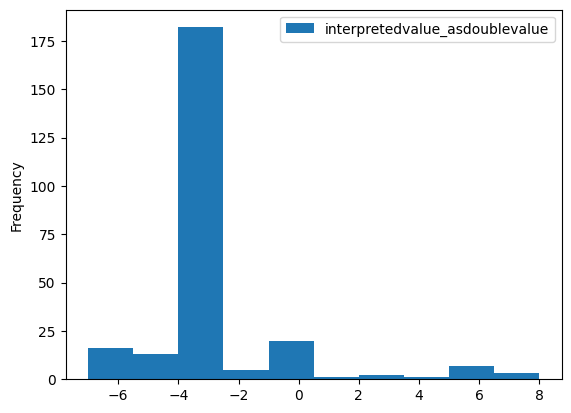

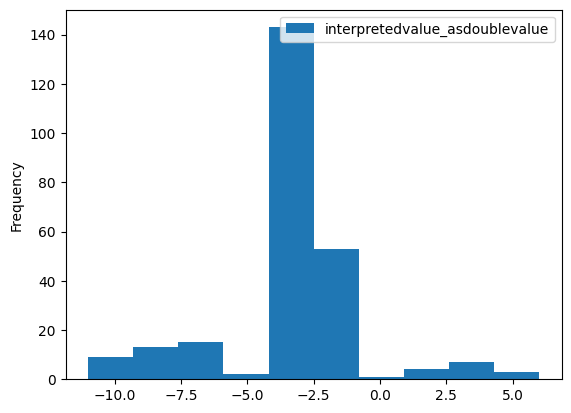

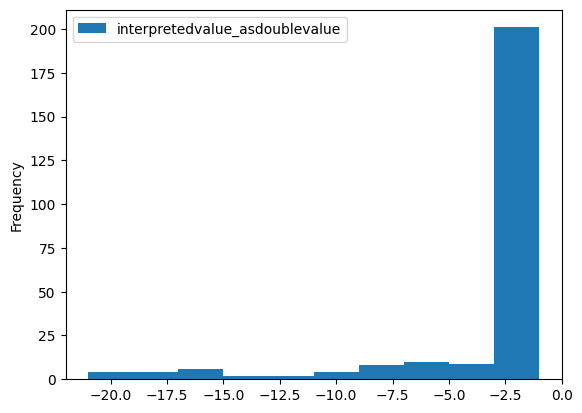

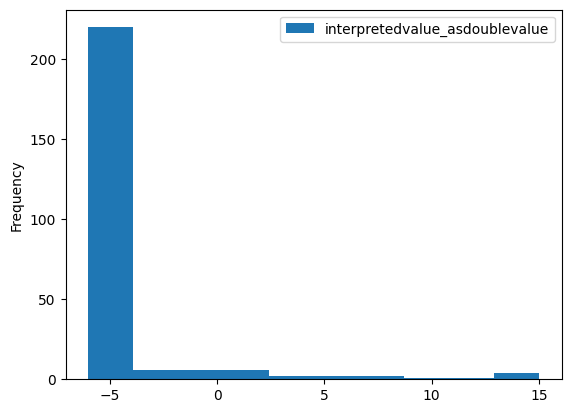

In [265]:
df_hohenwert.drop(['timeofoccurrence', 'rawvalue_signalvalue'], axis=1).groupby("position").plot(kind="hist") # or drop: rawvalue_signalvalue

In [266]:
df_hohenwert.groupby("position").count()

timeofoccurrence  rawvalue_signalvalue  \
position                                           
HL                     250                   250   
HR                     250                   250   
VL                     250                   250   
VR                     250                   250   

          interpretedvalue_asdoublevalue  signal  
position                                          
HL                                   250     250  
HR                                   250     250  
VL                                   250     250  
VR                                   250     250

In [267]:
df_hohenwert.groupby("timeofoccurrence").count()

rawvalue_signalvalue  interpretedvalue_asdoublevalue  \
timeofoccurrence                                                         
1651767894498                        4                               4   
1651767894518                        4                               4   
1651767894538                        4                               4   
1651767894558                        4                               4   
1651767894578                        4                               4   
...                                ...                             ...   
1651767899398                        4                               4   
1651767899418                        4                               4   
1651767899438                        4                               4   
1651767899458                        4                               4   
1651767899478                        4                               4   

                  signal  position  
timeofoccurrence                    
1651767894498          4         4  
1651767894518          4         4  
1651767894538          4         4  
1651767894558          4         4  
1651767894578          4         4  
...                  ...       ...  
1651767899398          4         4  
1651767899418          4         4  
1651767899438          4         4  
1651767899458          4         4  
1651767899478          4         4  

[250 rows x 4 columns]

# Pivot table according to time of occurence

In [268]:
df_hohenwert

timeofoccurrence  rawvalue_signalvalue  \
6324432     1651767894498                   106   
6324434     1651767894518                   106   
6324436     1651767894538                   106   
6324438     1651767894558                   107   
6324440     1651767894578                   108   
...                   ...                   ...   
6327922     1651767899398                   123   
6327924     1651767899418                   123   
6327926     1651767899438                   123   
6327928     1651767899458                   123   
6327930     1651767899478                   123   

         interpretedvalue_asdoublevalue      signal position  
6324432                           -21.0  Hoehenwert       VL  
6324434                           -21.0  Hoehenwert       VL  
6324436                           -21.0  Hoehenwert       VL  
6324438                           -20.0  Hoehenwert       VL  
6324440                           -19.0  Hoehenwert       VL  
...                                 ...         ...      ...  
6327922                            -4.0  Hoehenwert       HL  
6327924                            -4.0  Hoehenwert       HL  
6327926                            -4.0  Hoehenwert       HL  
6327928                            -4.0  Hoehenwert       HL  
6327930                            -4.0  Hoehenwert       HL  

[1000 rows x 5 columns]

In [269]:
sample_matrix_hohenwert = df_hohenwert.pivot(index='timeofoccurrence', columns='position', values='interpretedvalue_asdoublevalue')

In [270]:
sample_matrix_hohenwert

position           HL    HR    VL    VR
timeofoccurrence                       
1651767894498     8.0 -11.0 -21.0   6.0
1651767894518     8.0 -11.0 -21.0   8.0
1651767894538     7.0 -11.0 -21.0  10.0
1651767894558     6.0 -10.0 -20.0  13.0
1651767894578     6.0 -10.0 -19.0  14.0
...               ...   ...   ...   ...
1651767899398    -4.0  -3.0  -2.0  -6.0
1651767899418    -4.0  -3.0  -2.0  -6.0
1651767899438    -4.0  -3.0  -2.0  -6.0
1651767899458    -4.0  -3.0  -2.0  -6.0
1651767899478    -4.0  -3.0  -2.0  -6.0

[250 rows x 4 columns]

In [271]:
sample_matrix_hohenwert[sample_matrix_hohenwert.isna().any(axis=1)]

Empty DataFrame
Columns: [HL, HR, VL, VR]
Index: []

In [272]:
cov_matrix_hohenwert = sample_matrix_hohenwert.cov()

<AxesSubplot:xlabel='position', ylabel='position'>

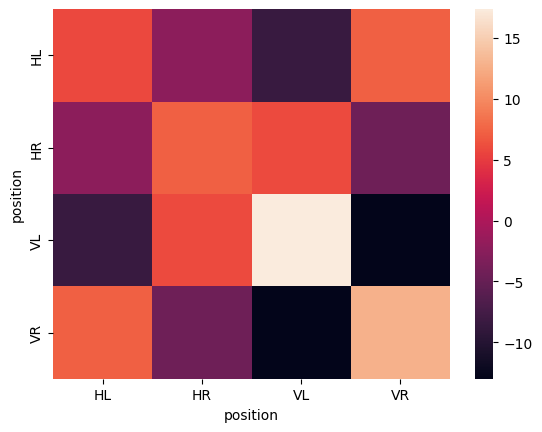

In [273]:
sns.heatmap(cov_matrix_hohenwert)

<AxesSubplot:xlabel='timeofoccurrence'>

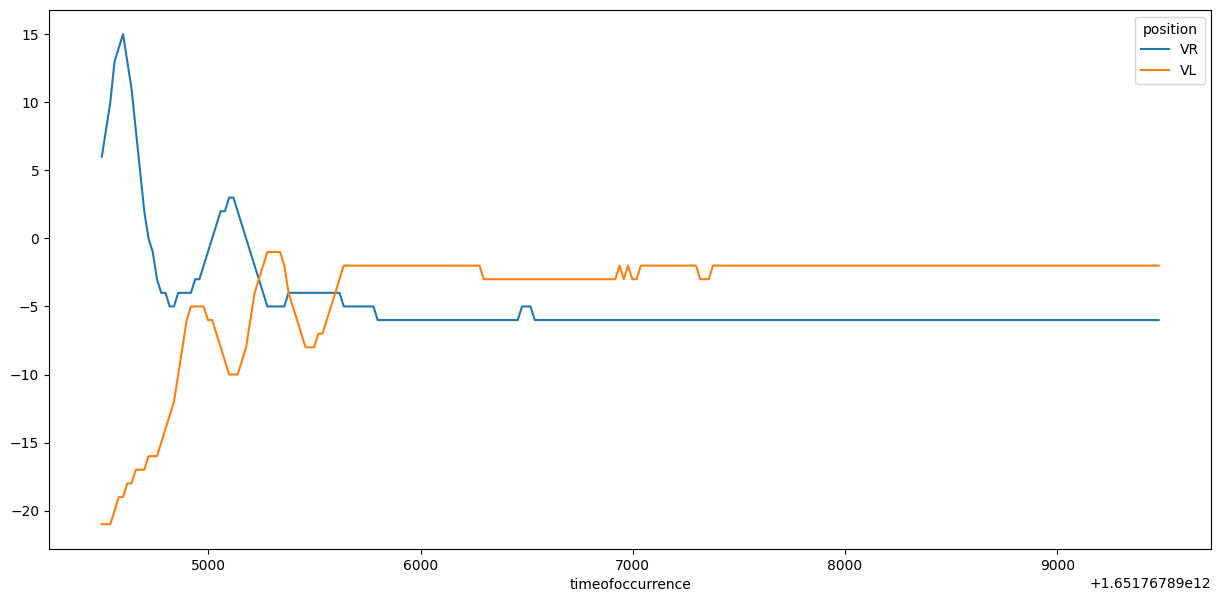

In [274]:
sample_matrix_hohenwert[["VR", "VL"]].plot(kind="line", figsize=(15,7))

<AxesSubplot:xlabel='timeofoccurrence'>

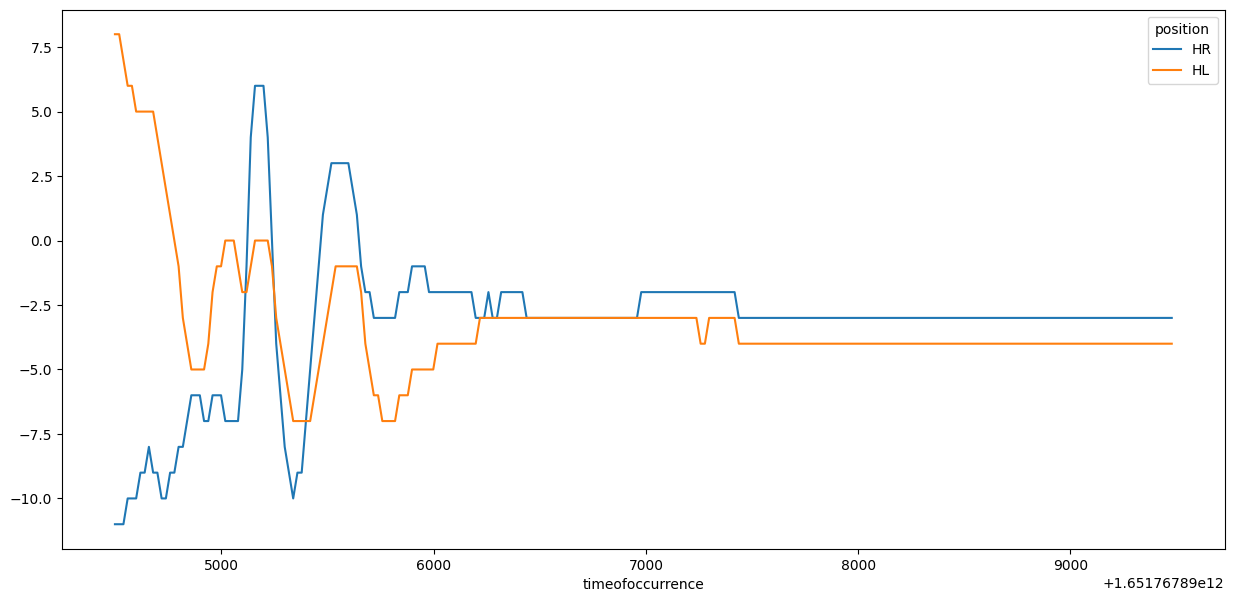

In [275]:
sample_matrix_hohenwert[["HR", "HL"]].plot(kind="line", figsize=(15,7))

# Distribution of acceleration values

In [276]:
dfFA_filtered_formatted

timeofoccurrence  rawvalue_signalvalue  \
6323932     1651767894498                   987   
6323934     1651767894518                  1025   
6323936     1651767894538                  1044   
6323938     1651767894558                  1063   
6323940     1651767894578                  1069   
...                   ...                   ...   
6327922     1651767899398                   123   
6327924     1651767899418                   123   
6327926     1651767899438                   123   
6327928     1651767899458                   123   
6327930     1651767899478                   123   

         interpretedvalue_asdoublevalue            signal position  
6323932                           -0.71  BodyAcceleration       HL  
6323934                            0.05  BodyAcceleration       HL  
6323936                            0.43  BodyAcceleration       HL  
6323938                            0.81  BodyAcceleration       HL  
6323940                            0.93  BodyAcceleration       HL  
...                                 ...               ...      ...  
6327922                           -4.00        Hoehenwert       HL  
6327924                           -4.00        Hoehenwert       HL  
6327926                           -4.00        Hoehenwert       HL  
6327928                           -4.00        Hoehenwert       HL  
6327930                           -4.00        Hoehenwert       HL  

[2000 rows x 5 columns]

In [277]:
df_body_acceleration = dfFA_filtered_formatted[dfFA_filtered_formatted.signal == "BodyAcceleration"]

In [278]:
df_body_acceleration.columns

Index(['timeofoccurrence', 'rawvalue_signalvalue',
       'interpretedvalue_asdoublevalue', 'signal', 'position'],
      dtype='object')

In [279]:
df_body_acceleration

timeofoccurrence  rawvalue_signalvalue  \
6323932     1651767894498                   987   
6323934     1651767894518                  1025   
6323936     1651767894538                  1044   
6323938     1651767894558                  1063   
6323940     1651767894578                  1069   
...                   ...                   ...   
6327422     1651767899398                  1048   
6327424     1651767899418                  1070   
6327426     1651767899438                   992   
6327428     1651767899458                   990   
6327430     1651767899478                  1063   

         interpretedvalue_asdoublevalue            signal position  
6323932                           -0.71  BodyAcceleration       HL  
6323934                            0.05  BodyAcceleration       HL  
6323936                            0.43  BodyAcceleration       HL  
6323938                            0.81  BodyAcceleration       HL  
6323940                            0.93  BodyAcceleration       HL  
...                                 ...               ...      ...  
6327422                            0.51  BodyAcceleration       HR  
6327424                            0.95  BodyAcceleration       HR  
6327426                           -0.61  BodyAcceleration       HR  
6327428                           -0.65  BodyAcceleration       HR  
6327430                            0.81  BodyAcceleration       HR  

[1000 rows x 5 columns]

position
HL    AxesSubplot(0.125,0.11;0.775x0.77)
HR    AxesSubplot(0.125,0.11;0.775x0.77)
VL    AxesSubplot(0.125,0.11;0.775x0.77)
VR    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

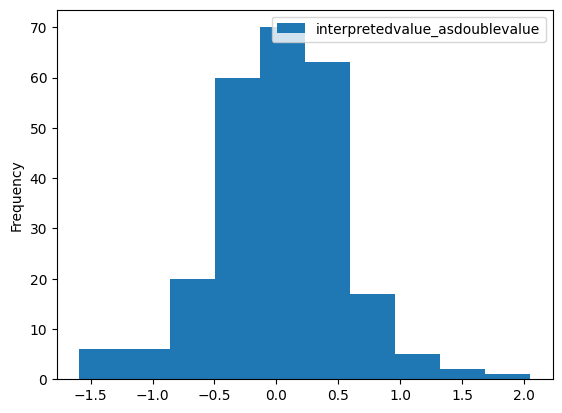

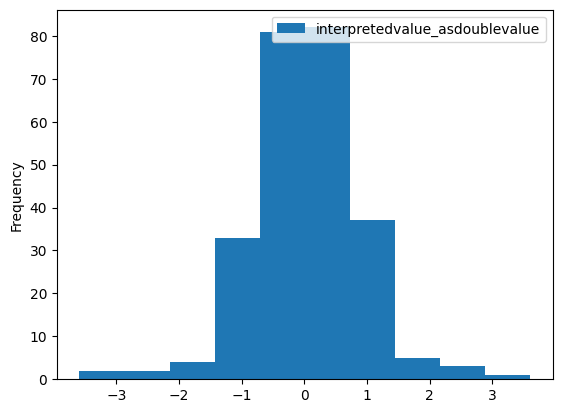

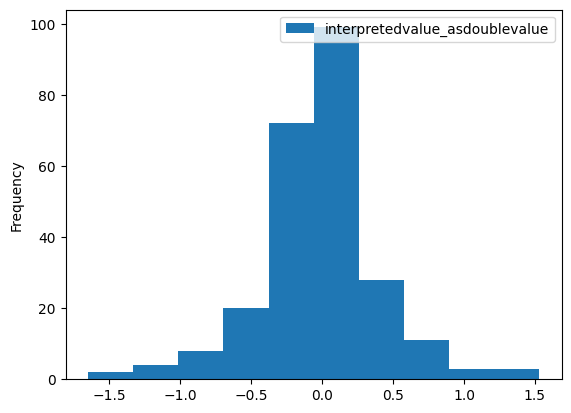

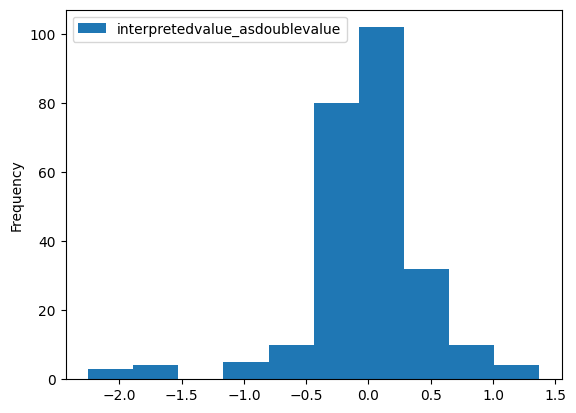

In [280]:
df_body_acceleration.drop(["rawvalue_signalvalue", "timeofoccurrence"], axis=1).groupby("position").plot(kind="hist") # or drop: rawvalue_signalvalue

In [281]:
df_body_acceleration.groupby("position").count()

timeofoccurrence  rawvalue_signalvalue  \
position                                           
HL                     250                   250   
HR                     250                   250   
VL                     250                   250   
VR                     250                   250   

          interpretedvalue_asdoublevalue  signal  
position                                          
HL                                   250     250  
HR                                   250     250  
VL                                   250     250  
VR                                   250     250

In [282]:
df_body_acceleration.groupby("timeofoccurrence").count()

rawvalue_signalvalue  interpretedvalue_asdoublevalue  \
timeofoccurrence                                                         
1651767894498                        3                               3   
1651767894508                        1                               1   
1651767894518                        3                               3   
1651767894528                        1                               1   
1651767894538                        3                               3   
...                                ...                             ...   
1651767899448                        1                               1   
1651767899458                        3                               3   
1651767899468                        1                               1   
1651767899478                        3                               3   
1651767899488                        1                               1   

                  signal  position  
timeofoccurrence                    
1651767894498          3         3  
1651767894508          1         1  
1651767894518          3         3  
1651767894528          1         1  
1651767894538          3         3  
...                  ...       ...  
1651767899448          1         1  
1651767899458          3         3  
1651767899468          1         1  
1651767899478          3         3  
1651767899488          1         1  

[500 rows x 4 columns]

# Find which signal is not synchronized with the others and align time of occurence (acceleration data) -> VR is not aligned

In [283]:
sample_matrix_acc = df_body_acceleration.pivot(index='timeofoccurrence', columns='position', values='interpretedvalue_asdoublevalue') # .iloc[:35639]# .fillna(axis=0, method='bfill')
sample_matrix_acc

position            HL    HR    VL    VR
timeofoccurrence                        
1651767894498    -0.71 -0.93  0.37   NaN
1651767894508      NaN   NaN   NaN -0.05
1651767894518     0.05 -0.31 -0.05   NaN
1651767894528      NaN   NaN   NaN -0.93
1651767894538     0.43 -0.97  0.11   NaN
...                ...   ...   ...   ...
1651767899448      NaN   NaN   NaN  0.35
1651767899458    -0.31 -0.65  0.21   NaN
1651767899468      NaN   NaN   NaN  0.21
1651767899478     0.61  0.81 -0.07   NaN
1651767899488      NaN   NaN   NaN -0.47

[500 rows x 4 columns]

In [284]:
timeofoccurence_VR_ori = df_body_acceleration.loc[df_body_acceleration["position"] == "VR"].timeofoccurrence
timeofoccurence_VR_aligned = df_body_acceleration.loc[df_body_acceleration["position"] == "VR"].timeofoccurrence.add(-10)

In [285]:
timeofoccurence_VR_ori - timeofoccurence_VR_aligned

6325932    10
6325934    10
6325936    10
6325938    10
6325940    10
           ..
6326422    10
6326424    10
6326426    10
6326428    10
6326430    10
Name: timeofoccurrence, Length: 250, dtype: int64

In [286]:
df_body_acceleration.loc[df_body_acceleration["position"] == "VR", "timeofoccurrence"] = timeofoccurence_VR_aligned.values

In [287]:
sample_matrix_acc = df_body_acceleration.pivot(index='timeofoccurrence', columns='position', values='interpretedvalue_asdoublevalue') #.iloc[:35639]# .fillna(axis=0, method='bfill')
sample_matrix_acc

position            HL    HR    VL    VR
timeofoccurrence                        
1651767894498    -0.71 -0.93  0.37 -0.05
1651767894518     0.05 -0.31 -0.05 -0.93
1651767894538     0.43 -0.97  0.11 -2.19
1651767894558     0.81 -0.95 -0.13 -2.09
1651767894578     0.93 -0.81 -0.33 -2.25
...                ...   ...   ...   ...
1651767899398     0.51  0.51  0.05 -0.35
1651767899418     0.33  0.95 -0.33 -0.23
1651767899438    -0.45 -0.61  0.09  0.35
1651767899458    -0.31 -0.65  0.21  0.21
1651767899478     0.61  0.81 -0.07 -0.47

[250 rows x 4 columns]

In [288]:
sample_matrix_acc[sample_matrix_acc.isna().any(axis=1)]

Empty DataFrame
Columns: [HL, HR, VL, VR]
Index: []

position        HL        HR        VL        VR
position                                        
HL        0.275324  0.322534 -0.022501 -0.085389
HR        0.322534  0.762021 -0.237552  0.054605
VL       -0.022501 -0.237552  0.182550 -0.019316
VR       -0.085389  0.054605 -0.019316  0.228512


<AxesSubplot:xlabel='position', ylabel='position'>

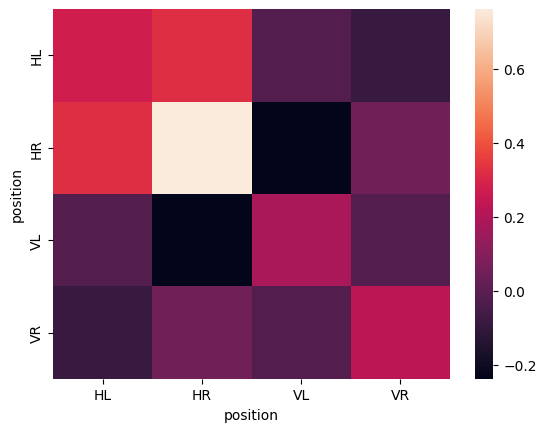

In [289]:
cov_matrix_acceleration = sample_matrix_acc.cov()
print(cov_matrix_acceleration)
sns.heatmap(cov_matrix_acceleration)

<AxesSubplot:xlabel='timeofoccurrence'>

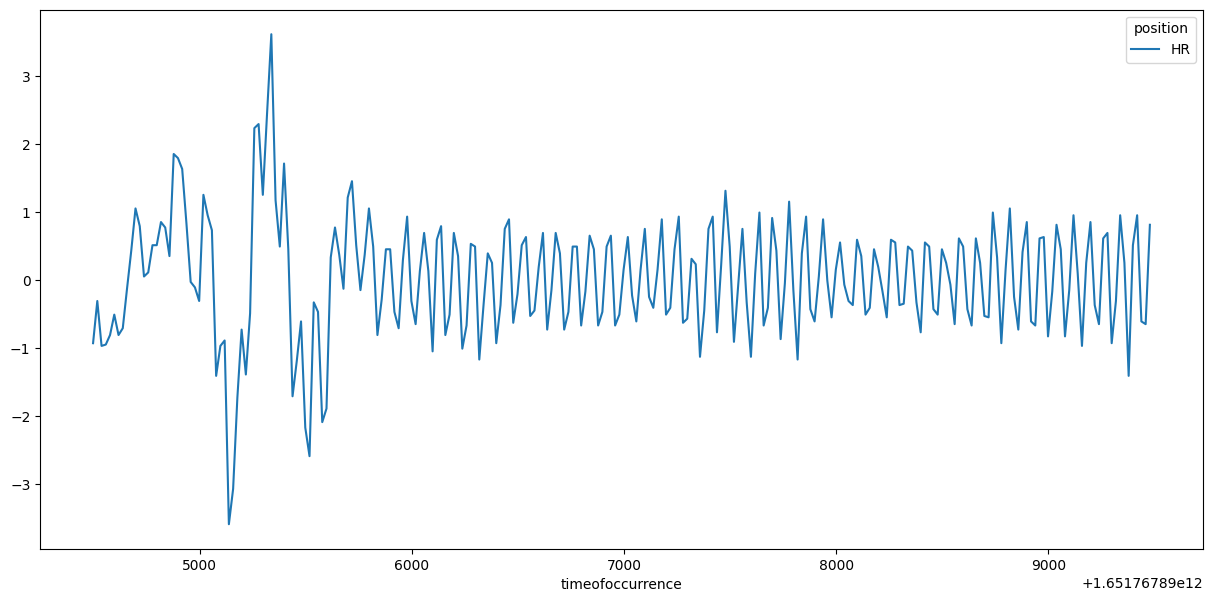

In [306]:
sample_matrix_acc[["HR"]].plot(kind="line", figsize=(15,7))

<AxesSubplot:xlabel='timeofoccurrence'>

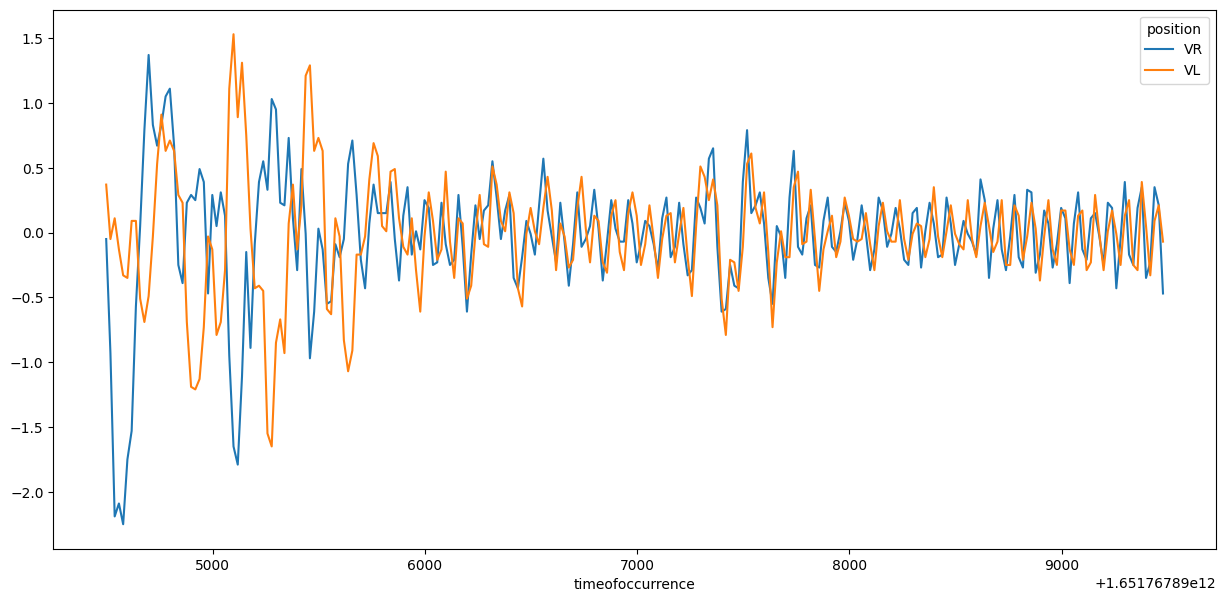

In [290]:
sample_matrix_acc[["VR", "VL"]].plot(kind="line", figsize=(15,7))

<AxesSubplot:xlabel='timeofoccurrence'>

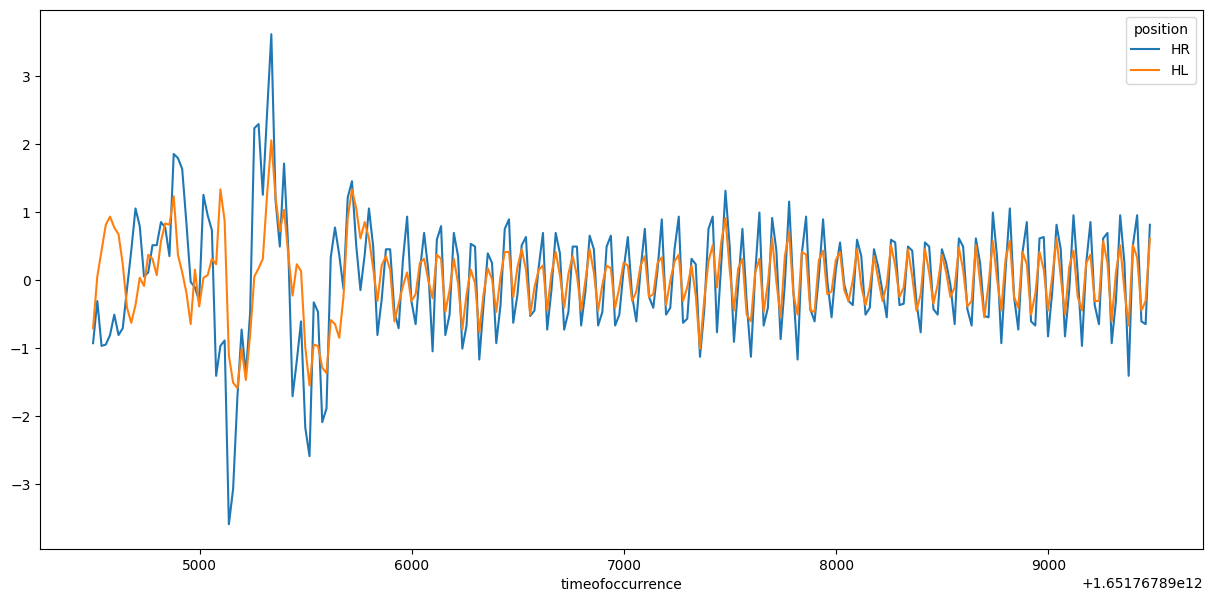

In [291]:
sample_matrix_acc[["HR", "HL"]].plot(kind="line", figsize=(15,7))

<AxesSubplot:xlabel='timeofoccurrence'>

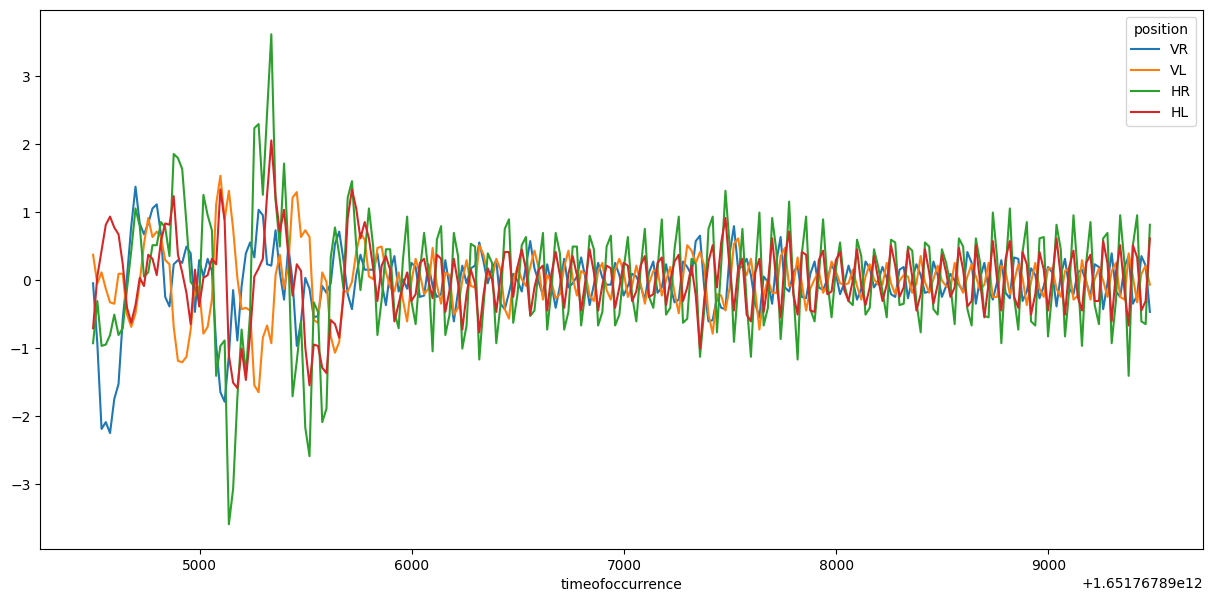

In [305]:
sample_matrix_acc[["VR", "VL","HR", "HL"]].plot(kind="line", figsize=(15,7))

# ESP data analysis

In [292]:
dfESP

metadata_sourceid  metadata_sessionsequence  \
6323432        Porsche:AT                         0   
6323434        Porsche:AT                         0   
6323436        Porsche:AT                         0   
6323438        Porsche:AT                         0   
6323440        Porsche:AT                         0   
...                   ...                       ...   
6323922        Porsche:AT                         0   
6323924        Porsche:AT                         0   
6323926        Porsche:AT                         0   
6323928        Porsche:AT                         0   
6323930        Porsche:AT                         0   

                            metadata_pvin        date signaldata_signalname  \
6323432  18c237c11bfba998fc2d317b6858c315  2022-05-05          ESP_v_Signal   
6323434  18c237c11bfba998fc2d317b6858c315  2022-05-05          ESP_v_Signal   
6323436  18c237c11bfba998fc2d317b6858c315  2022-05-05          ESP_v_Signal   
6323438  18c237c11bfba998fc2d317b6858c315  2022-05-05          ESP_v_Signal   
6323440  18c237c11bfba998fc2d317b6858c315  2022-05-05          ESP_v_Signal   
...                                   ...         ...                   ...   
6323922  18c237c11bfba998fc2d317b6858c315  2022-05-05          ESP_v_Signal   
6323924  18c237c11bfba998fc2d317b6858c315  2022-05-05          ESP_v_Signal   
6323926  18c237c11bfba998fc2d317b6858c315  2022-05-05          ESP_v_Signal   
6323928  18c237c11bfba998fc2d317b6858c315  2022-05-05          ESP_v_Signal   
6323930  18c237c11bfba998fc2d317b6858c315  2022-05-05          ESP_v_Signal   

         signaldata_timeofoccurrence  signaldata_rawvalue_signalvalue  \
6323432                1651767894499                              855   
6323434                1651767894519                              849   
6323436                1651767894539                              843   
6323438                1651767894559                              838   
6323440                1651767894579                              838   
...                              ...                              ...   
6323922                1651767899399                                0   
6323924                1651767899419                                0   
6323926                1651767899439                                0   
6323928                1651767899459                                0   
6323930                1651767899479                                0   

         signaldata_interpretedvalue_asdoublevalue  
6323432                                       8.55  
6323434                                       8.49  
6323436                                       8.43  
6323438                                       8.38  
6323440                                       8.38  
...                                            ...  
6323922                                       0.00  
6323924                                       0.00  
6323926                                       0.00  
6323928                                       0.00  
6323930                                       0.00  

[250 rows x 8 columns]

In [293]:
dfESP["signaldata_rawvalue_signalvalue"].value_counts()

0      102
56       7
73       5
33       4
652      4
      ... 
568      1
573      1
585      1
590      1
399      1
Name: signaldata_rawvalue_signalvalue, Length: 110, dtype: int64

In [294]:
#dfESP_2022_04_30 = dfESP[dfESP["date"] == "2022-04-30"]
dfESP = dfESP.rename(columns=lambda s: s.replace("signaldata_", ""))
dfESP # .groupby("timeofoccurrence").count()

metadata_sourceid  metadata_sessionsequence  \
6323432        Porsche:AT                         0   
6323434        Porsche:AT                         0   
6323436        Porsche:AT                         0   
6323438        Porsche:AT                         0   
6323440        Porsche:AT                         0   
...                   ...                       ...   
6323922        Porsche:AT                         0   
6323924        Porsche:AT                         0   
6323926        Porsche:AT                         0   
6323928        Porsche:AT                         0   
6323930        Porsche:AT                         0   

                            metadata_pvin        date    signalname  \
6323432  18c237c11bfba998fc2d317b6858c315  2022-05-05  ESP_v_Signal   
6323434  18c237c11bfba998fc2d317b6858c315  2022-05-05  ESP_v_Signal   
6323436  18c237c11bfba998fc2d317b6858c315  2022-05-05  ESP_v_Signal   
6323438  18c237c11bfba998fc2d317b6858c315  2022-05-05  ESP_v_Signal   
6323440  18c237c11bfba998fc2d317b6858c315  2022-05-05  ESP_v_Signal   
...                                   ...         ...           ...   
6323922  18c237c11bfba998fc2d317b6858c315  2022-05-05  ESP_v_Signal   
6323924  18c237c11bfba998fc2d317b6858c315  2022-05-05  ESP_v_Signal   
6323926  18c237c11bfba998fc2d317b6858c315  2022-05-05  ESP_v_Signal   
6323928  18c237c11bfba998fc2d317b6858c315  2022-05-05  ESP_v_Signal   
6323930  18c237c11bfba998fc2d317b6858c315  2022-05-05  ESP_v_Signal   

         timeofoccurrence  rawvalue_signalvalue  \
6323432     1651767894499                   855   
6323434     1651767894519                   849   
6323436     1651767894539                   843   
6323438     1651767894559                   838   
6323440     1651767894579                   838   
...                   ...                   ...   
6323922     1651767899399                     0   
6323924     1651767899419                     0   
6323926     1651767899439                     0   
6323928     1651767899459                     0   
6323930     1651767899479                     0   

         interpretedvalue_asdoublevalue  
6323432                            8.55  
6323434                            8.49  
6323436                            8.43  
6323438                            8.38  
6323440                            8.38  
...                                 ...  
6323922                            0.00  
6323924                            0.00  
6323926                            0.00  
6323928                            0.00  
6323930                            0.00  

[250 rows x 8 columns]

In [295]:
dfESP.groupby("metadata_sessionsequence").count()

metadata_sourceid  metadata_pvin  date  signalname  \
metadata_sessionsequence                                                       
0                                       250            250   250         250   

                          timeofoccurrence  rawvalue_signalvalue  \
metadata_sessionsequence                                           
0                                      250                   250   

                          interpretedvalue_asdoublevalue  
metadata_sessionsequence                                  
0                                                    250

In [296]:
dfESP.groupby("metadata_sourceid").count()

metadata_sessionsequence  metadata_pvin  date  signalname  \
metadata_sourceid                                                              
Porsche:AT                              250            250   250         250   

                   timeofoccurrence  rawvalue_signalvalue  \
metadata_sourceid                                           
Porsche:AT                      250                   250   

                   interpretedvalue_asdoublevalue  
metadata_sourceid                                  
Porsche:AT                                    250

In [297]:
dfESP.groupby("metadata_pvin").count()

metadata_sourceid  metadata_sessionsequence  \
metadata_pvin                                                                   
18c237c11bfba998fc2d317b6858c315                250                       250   

                                  date  signalname  timeofoccurrence  \
metadata_pvin                                                          
18c237c11bfba998fc2d317b6858c315   250         250               250   

                                  rawvalue_signalvalue  \
metadata_pvin                                            
18c237c11bfba998fc2d317b6858c315                   250   

                                  interpretedvalue_asdoublevalue  
metadata_pvin                                                     
18c237c11bfba998fc2d317b6858c315                             250

In [299]:
dfESP_filtered = dfESP.drop(["metadata_sourceid", "metadata_sessionsequence", "metadata_pvin", "date", "signalname"], axis=1)

<AxesSubplot:>

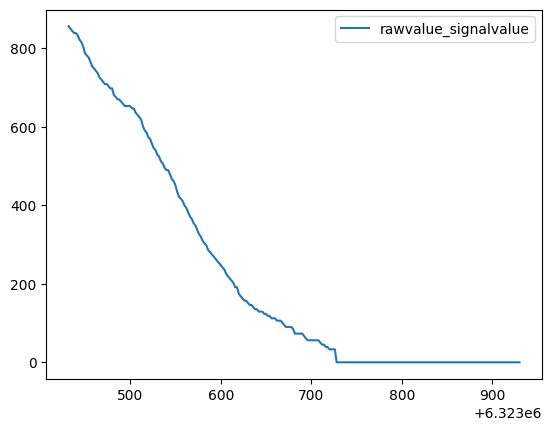

In [300]:
dfESP_filtered[["rawvalue_signalvalue"]].plot(kind="line")

<AxesSubplot:>

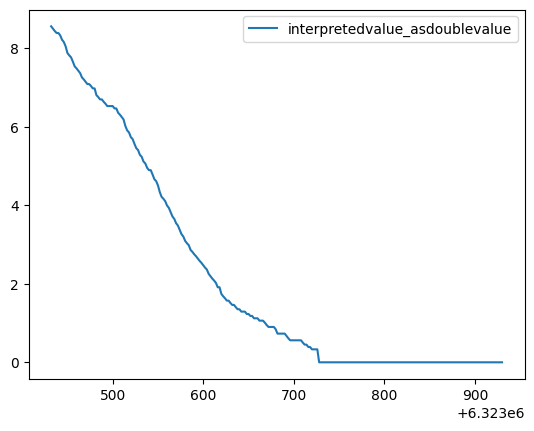

In [301]:
dfESP_filtered[["interpretedvalue_asdoublevalue"]].plot(kind="line")

In [302]:
dfESP_filtered

timeofoccurrence  rawvalue_signalvalue  \
6323432     1651767894499                   855   
6323434     1651767894519                   849   
6323436     1651767894539                   843   
6323438     1651767894559                   838   
6323440     1651767894579                   838   
...                   ...                   ...   
6323922     1651767899399                     0   
6323924     1651767899419                     0   
6323926     1651767899439                     0   
6323928     1651767899459                     0   
6323930     1651767899479                     0   

         interpretedvalue_asdoublevalue  
6323432                            8.55  
6323434                            8.49  
6323436                            8.43  
6323438                            8.38  
6323440                            8.38  
...                                 ...  
6323922                            0.00  
6323924                            0.00  
6323926                            0.00  
6323928                            0.00  
6323930                            0.00  

[250 rows x 3 columns]

In [303]:
sample_matrix_acc

position            HL    HR    VL    VR
timeofoccurrence                        
1651767894498    -0.71 -0.93  0.37 -0.05
1651767894518     0.05 -0.31 -0.05 -0.93
1651767894538     0.43 -0.97  0.11 -2.19
1651767894558     0.81 -0.95 -0.13 -2.09
1651767894578     0.93 -0.81 -0.33 -2.25
...                ...   ...   ...   ...
1651767899398     0.51  0.51  0.05 -0.35
1651767899418     0.33  0.95 -0.33 -0.23
1651767899438    -0.45 -0.61  0.09  0.35
1651767899458    -0.31 -0.65  0.21  0.21
1651767899478     0.61  0.81 -0.07 -0.47

[250 rows x 4 columns]

In [304]:
sample_matrix_hohenwert

position           HL    HR    VL    VR
timeofoccurrence                       
1651767894498     8.0 -11.0 -21.0   6.0
1651767894518     8.0 -11.0 -21.0   8.0
1651767894538     7.0 -11.0 -21.0  10.0
1651767894558     6.0 -10.0 -20.0  13.0
1651767894578     6.0 -10.0 -19.0  14.0
...               ...   ...   ...   ...
1651767899398    -4.0  -3.0  -2.0  -6.0
1651767899418    -4.0  -3.0  -2.0  -6.0
1651767899438    -4.0  -3.0  -2.0  -6.0
1651767899458    -4.0  -3.0  -2.0  -6.0
1651767899478    -4.0  -3.0  -2.0  -6.0

[250 rows x 4 columns]

columns: pvin, sess
# - Questions:
    - Done: What does ESP mean? -> steureungsgerät to control the velocity
    - Asked: Why are there session sequence with different number of values (250, 500, 1000) ?
    - Asked: What does acceleration mean? what is it measuring? what kind of sensor? can you explain the acceleration values in the plot? 
        -> sensor placed on the doam, measures force that is pushing or pulling the doam (z axis probably)
    - Done: are the acceleration signal values of (VR) shifted? Is this on purpose? or is it due to some sensor delay? 
    - Done: What is the difference between time of receipt (metadata) and time of occurence (signal data)? why do they have different number of values? -> 5s diff
    - Done: Does the grouping make sense to you? 
    - Done: After the grouping (select one source_id, one pvin, one session sequence and one day) -> the number of values for each of the nine signals is different across different session sequences. why? 
    - Done: What is the meaning of the signal data interpreted value asstring value? (Cx7f2_init, Cx7fe_nicht_initialisiert, Cxfffe_Init, None) -> not sure 
    - Why are all the rows (values) marked as "not as error" although in the "is_valid" column some are marked as being errors?
        - guess: find correlation between errors columns and interpreted value asstring value -> notify in case I find something 

- freq of all sensors: 50 hz -> (20ms)
- Rad Hinten Rechts -> acceleration is not a real sensor; It is calculated 
- Using interpretedvalue_asdoublevalue passed sanity check 
- Filip

# TODO: Create the training dataset (window size)
    # col : car_id, ith datapoint: 9 signal values with window size per row -> expanded columnwise: 
    # The pvin | date | sequence_number | source_id | ESP values | acc values | hohenwert values 

new compaign -> from session id to pvin oriented 
access to the new compagin Campaign-ID: 7f6a4827-379c-496f-b0bb-6b0a119f8cc1
acces the documentation 

[09:40] Kai-Fabian Wolf - areto consulting
https://skyway.porsche.com/confluence/display/PANAMERA/Special+Event%3A+Missuse+Detection
Porsche Skyway Login

[09:41] Kai-Fabian Wolf - areto consulting
Documentation for the use-case /campaign

[10:14] Kai-Fabian Wolf - areto consulting


ask alissa if I am allowed to access the new data 
meeting every tuesday at 2pm for 1 hour 